# CLASSIFICATION PROBLEMS

- KNN - K-Nearest Neighbor
- SVR - Support Vector Regression
- MLP - Multilayer Perceptron
- CART - Classification and Regression Trees
- Bagging (Bootstrap Aggregation)
- RF - Random Forests
- GBM - Gradient Boosting Machines
- XGBoost - Extreme Gradient Boosting
- LightGBM
- CatBoost

In [ ]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Logistic Regression

## Model

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [4]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

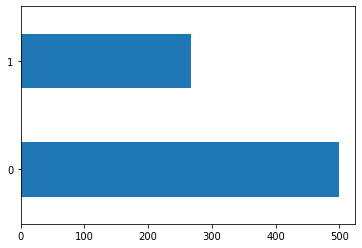

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

- statsmodels:

In [8]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Nov 2019   Pseudo R-squ.:                 0.05922
Time:                        14:47:52   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

- scikit-learn:

In [9]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
loj_model.intercept_

array([-5.88848445])

In [11]:
loj_model.coef_

array([[ 1.17086830e-01,  2.83748521e-02, -1.68971977e-02,
         7.45588118e-04, -6.42652274e-04,  5.97050348e-02,
         6.81461374e-01,  7.21476320e-03]])

## Prediction & Model Tuning

In [12]:
y_pred = loj_model.predict(X)

- Errors:

In [13]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

- Rate of correct classification:

In [14]:
accuracy_score(y, y_pred)

0.7760416666666666

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



- Predicted values:

In [16]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

- Probabilities for 0 (left) and 1 (right):

In [17]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35043775, 0.64956225],
       [0.9169891 , 0.0830109 ],
       [0.22455276, 0.77544724],
       [0.92139736, 0.07860264],
       [0.16635686, 0.83364314],
       [0.79900619, 0.20099381],
       [0.88017597, 0.11982403],
       [0.27815669, 0.72184331],
       [0.32117452, 0.67882548],
       [0.92268273, 0.07731727]])

- Real values:

In [18]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

- Choose 1:

In [19]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [20]:
y_probs[0:10]

array([0.64956225, 0.0830109 , 0.77544724, 0.07860264, 0.83364314,
       0.20099381, 0.11982403, 0.72184331, 0.67882548, 0.07731727])

Give 1 to the values bigger than 0.5; 0 to the others:

In [21]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [22]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

- Confusion matrix:

In [23]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [120, 148]])

- Accuracy rate: correctly done ones / all)

In [24]:
accuracy_score(y, y_pred)

0.7760416666666666

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [26]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64956225, 0.0830109 , 0.77544724, 0.07860264, 0.83364314])

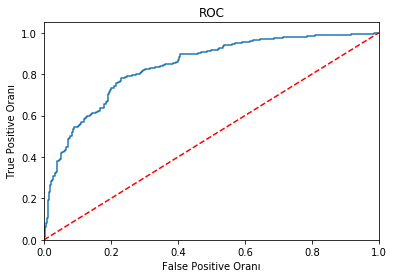

In [27]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

**blue** -  used to estimate the success

**red** - success of a random work without any model

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


- Fit model on train:

In [29]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

- First parameter - real value; second parameter - predicted value:

In [30]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7575757575757576

- Mean of cross val:

In [31]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7661231884057971

# Gaussian Naive Bayes

## Model & Prediction

In [32]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)



test size = 30

30% for test 

No hyperparameter to optimize.

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

- Probabilities for 0 and 1:

In [36]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [37]:
y_pred = nb_model.predict(X_test)

- Test error:

In [38]:
accuracy_score(y_test, y_pred)

0.7445887445887446

- Validated test error:

In [39]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.775

# KNN - K Nearest Neighbour

## Model & Prediction

In [40]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [41]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

- Find optimum hyperparameter values:

In [45]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [46]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [47]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.7486033519553073
Best parameters: {'n_neighbors': 11}


## Final Model

In [48]:
knn = KNeighborsClassifier(11)
knn_tuned = knn.fit(X_train, y_train)

In [49]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [50]:
y_pred = knn_tuned.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# SVC - Support Vector Classification

## Model & Prediction

In [52]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [53]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [54]:
svm_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

- Test error:

In [55]:
y_pred = svm_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

- Tune the parameter C; it cannot be 0:

In [57]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 13.2min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [59]:
print("Best parameters: " + str(svc_cv_model.best_params_))

Best parameters: {'C': 5}


## Final Model

In [60]:
svc_tuned = SVC(kernel = "linear", C = 5).fit(X_train, y_train)

- Test error for real values and predicted values:

In [61]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC - Radial Basis Function SVC (Nonlinear SVC)

## Model & Tahmin

In [62]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [63]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [64]:
svc_model

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6536796536796536

## Model Tuning

- C and gamma are important parameters:

In [66]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [67]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    3.9s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [68]:
print("Best parameters: " + str(svc_cv_model.best_params_))

Best parameters: {'C': 10, 'gamma': 0.0001}


## Final Model

In [69]:
svc_tuned = SVC(C = 10, gamma = 0.0001).fit(X_train, y_train)

In [70]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Artificial Neural Networks

## Model & Prediction

In [71]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [72]:
from sklearn.preprocessing import StandardScaler  

- Standardization:

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [75]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [76]:
from sklearn.neural_network import MLPClassifier

In [77]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)

In [78]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [79]:
mlpc

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [80]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}


In [81]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  9.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
               

In [82]:
print("Best parameters: " + str(mlpc_cv_model.best_params_))

Best parameters: {'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (100, 100), 'solver': 'sgd'}


## Final Model

In [83]:
mlpc_tuned = MLPClassifier(activation = "relu", 
                           alpha = 0.02, 
                           hidden_layer_sizes = (3, 5),
                          solver = "adam")

In [84]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(3, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [85]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7575757575757576

# CART - Classification and Regression Trees

## Model & Prediction

In [86]:
df = diabetes.copy()
df = df.dropna()
#y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [89]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [90]:
#!pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

(((0 if x[0] <= 0.5 else 0 if x[0] <= 1.5 else 0) if x[0] <= 2.5 else (0 if
    x[0] <= 3.5 else 0) if x[0] <= 4.5 else 0 if x[0] <= 5.5 else 0) if x[0
    ] <= 6.5 else (((1 if x[0] <= 7.5 else 1) if x[0] <= 8.5 else 1) if x[0
    ] <= 9.5 else (0 if x[0] <= 10.5 else 0) if x[0] <= 11.5 else 0 if x[0] <=
    12.5 else 0) if x[0] <= 13.5 else 1)



In [91]:
x = [9]

In [92]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [93]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.658008658008658

## Model Tuning

In [94]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [96]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:    7.6s finished


In [97]:
print("Best parameters: " + str(cart_cv_model.best_params_))

Best parameters: {'max_depth': 4, 'min_samples_split': 2}


## Final Model

In [98]:
cart = tree.DecisionTreeClassifier(max_depth = 4, min_samples_split = 2)
cart_tuned = cart.fit(X_train, y_train)

In [99]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.658008658008658

# Random Forests

## Model & Prediction

In [100]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [103]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [104]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [105]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [106]:
?rf_model

Type:        RandomForestClassifier
String form:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
           <...> obs=None, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
Length:      10
File:        /anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is always the same as the original
input sample size but the samples are drawn with replacement if
`bootstrap=True` (default).

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : integer, optional (default=10)
    The number of trees in the forest.

    .. versionchanged:: 0.20
       The default value of ``n_estimators`` will change from 10 in
       version 0.20 to 100 in vers

In [107]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [108]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [109]:
rf_cv_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 397 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 1045 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.9min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [110]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 10, 'max_features': 2, 'min_samples_split': 10, 'n_estimators': 10}


## Final Model

In [111]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 5, 
                                  min_samples_split = 10,
                                  n_estimators = 10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [112]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7142857142857143

In [113]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'VAriable importance levels')

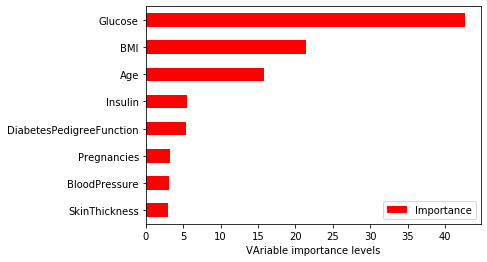

In [115]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("VAriable importance levels")

In [154]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

In [156]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [157]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [158]:
gbm_model

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [159]:
?gbm_model

Type:        GradientBoostingClassifier
String form:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
           learning_rate=0.1,  <...>    subsample=1.0, tol=0.0001, validation_fraction=0.1,
           verbose=0, warm_start=False)
Length:      100
File:        /anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, optional (default='deviance')
    loss function to be optimized. 'deviance' refers to
    deviance (= logistic regress

In [160]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [161]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [162]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  4.9min finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05], 'n_estimators': [100, 500, 100], 'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [163]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [164]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 5,
                                n_estimators = 500)

In [165]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [166]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# XGBoost

## Model

In [116]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [117]:
#!pip install xgboost
from xgboost import XGBClassifier

In [118]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [119]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [120]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [121]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [122]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_byno <...> reg_lambda=1, scale_pos_weight=1, seed=None,
           silent=None, subsample=1, verbosity=1)
File:        /anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.

Parameters
----------
max_depth : int
    Maximum tree depth for base learners.
learning_rate : float
    Boosting learning rate (xgb's "eta")
n_estimators : int
    Number of trees to fit.
verbosity : int
    The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
silent : boolean
    Whether to print messages while running boosting. Deprecated. Use verbosity instead.
objective : string or callable
    Specify the learning task and the corresponding learning objective or
    a custom objective function to be used (see note below).
booster: string
    Specify which booster to use: gbtree, gbline

In [123]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [124]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [125]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 395 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1043 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1488 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 2015 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 2622 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 3311 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 4080 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 4931 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 21.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2,

In [126]:
xgb_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [127]:
xgb = XGBClassifier(learning_rate = 0.01, 
                    max_depth = 6,
                    min_samples_split = 2,
                    n_estimators = 100,
                    subsample = 0.8)

In [128]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [129]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# LightGBM

## Model

In [130]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [131]:
#!conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier

In [132]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [133]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [134]:
lgbm_model

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [135]:
?lgbm_model

Type:           LGBMClassifier
String form:   
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           impo <...> ambda=0.0, silent=True,
           subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
File:           /anaconda3/lib/python3.7/site-packages/lightgbm/sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : string, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'goss', Gradient-based One-Side Sampling.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, -1 means no limit.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt 

In [136]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [137]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)



In [138]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 230 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 871 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1345 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2025 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2587 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3423 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4155 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 5185 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 5760 out of 5760 | elapsed: 10.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                  

In [139]:
lgbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 500,
 'subsample': 0.6}

In [140]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [141]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [142]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# CatBoost - Category Boosting

## Model & Prediction

In [143]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [144]:
#!pip install catboost
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

In [146]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Model Tuning

In [147]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [ ]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

In [149]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [ ]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

In [151]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7316017316017316